<a href="https://colab.research.google.com/github/Avijit-Panda/CAPSTONE/blob/main/Copy_of_Capstone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne
#MNE (MNE-Python) is a Python package for working with EEG

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 23.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.io import loadmat
data = loadmat('/content/drive/MyDrive/Capstone/Data/ADHD/v3p.mat')

In [ ]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Apr 12 15:32:42 2020',
 '__version__': '1.0',
 '__globals__': [],
 'v3p': array([[191, 156, 126, ..., 156,  85,  50],
        [ 85, 156, 236, ..., 332, 261, 156],
        [156, 261, 347, ..., 402, 261, 121],
        ...,
        [-19,  50, 126, ..., 156, 191, 156],
        [ 85,  85, 126, ...,  85, 121,  50],
        [ 50,  85,  89, ..., 226, 156, 121]], dtype=int16)}

In [ ]:
#data from .mat file is a dictionary , the readings are stored under file name as key, v3p is a sample filename used
eeg_data = data['v3p']
#we transpose as we require the data to be in the form of (num_channels,num_samles)
eeg_data=eeg_data.transpose()
eeg_data.shape

(19, 33570)

In [ ]:
import numpy as np
import mne

# eeg_data is a numpy array with shape (n_channels, n_samples)
#channel_names provided in dataset
ch_names = ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']  # List of channel names
sfreq = 128  # Sampling frequency also provided in dataset

# Create MNE info structure
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

# Create MNE Raw object
raw = mne.io.RawArray(data=eeg_data, info=info)


Creating RawArray with float64 data, n_channels=19, n_times=33570
    Range : 0 ... 33569 =      0.000 ...   262.258 secs
Ready.


Using matplotlib as 2D backend.


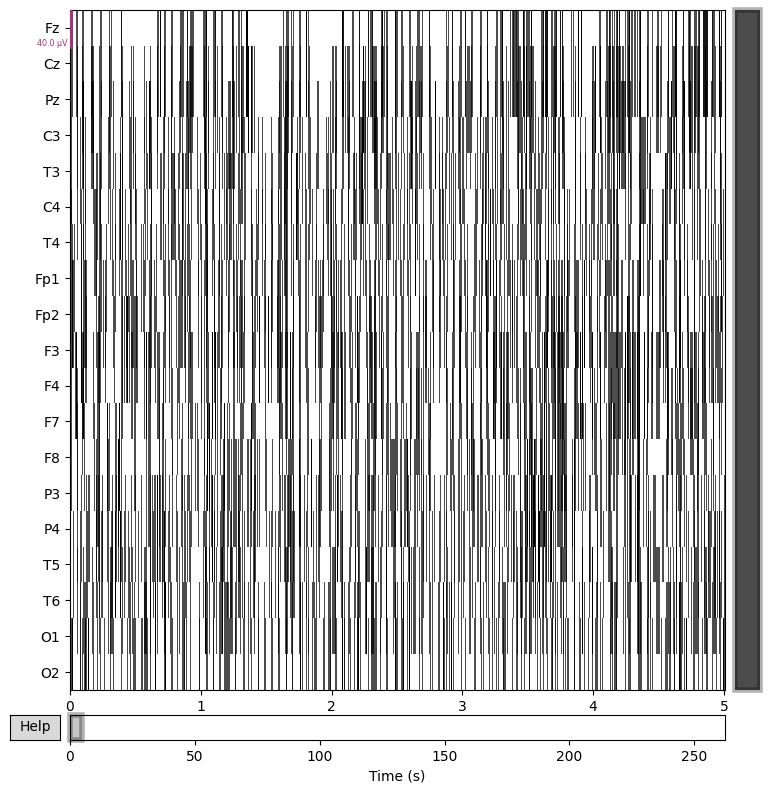

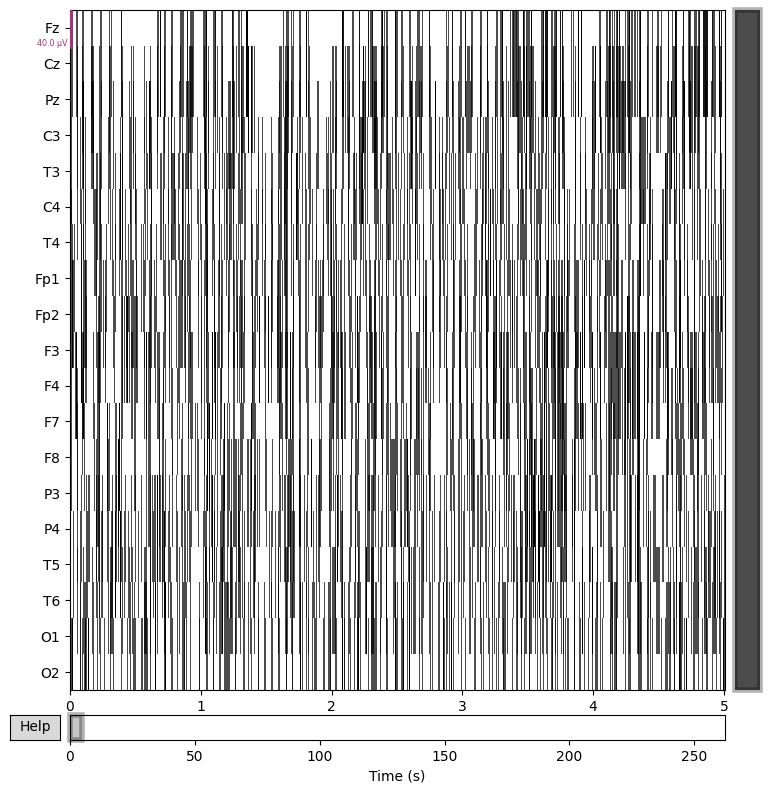

In [ ]:
raw.plot(duration=5, n_channels=19)


In [ ]:
from glob import glob
import os
import mne
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [ ]:
#accessing the dataest with glob
patient_file_path=glob("/content/drive/MyDrive/Capstone/Data/ADHD/*.mat")
control_file_path=glob("/content/drive/MyDrive/Capstone/Data/CONTROL/*.mat")
print(len(patient_file_path))
print((len(control_file_path)))

61
60


In [ ]:
#for edf input format , we cant use this but goof reference
def read_data(file_path):
  data=mne.io.read_raw_edf(file_path,preload=True)
  data.set_eeg_reference()
  data.filter(l_freq=0.5,h_freq=45)
  epochs=mne.make_fixed_length_epochs(data,duration=3,overlap=1)
  array=epochs.get_data()
  return array

In [ ]:
#trial to get key which is filename from the path
a=control_file_path[1]
a.split("/")[-1]

'v51p.mat'

In [ ]:
import scipy.io
import mne

def read_data(file_path):
    # Load .mat file
    mat_data = scipy.io.loadmat(file_path)

    # Extract EEG data
    eeg_data = mat_data[(file_path.split("/")[-1]).split(".")[0]]
    eeg_data=eeg_data.transpose()

    # Define channel names
    ch_names = ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']
    # Define sampling frequency
    sfreq = 128
    # Create MNE info structure
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    # Create MNE Raw object
    raw = mne.io.RawArray(data=eeg_data, info=info)
    # Set EEG reference
    # now trying with average
    raw.set_eeg_reference(ref_channels='average')
    # Apply bandpass filter
    # Delta (0.5 - 4 Hz): Associated with deep sleep and certain cognitive processes.
    # Theta (4 - 8 Hz): Related to memory processes, attention, and some meditative states.
    # Alpha (8 - 13 Hz): Most prominent in relaxed states with eyes closed, often related to a resting state or mental relaxation.
    # Beta (13 - 30 Hz): Associated with active cognitive processing, alertness, and concentration.
    # Gamma (30 - 100 Hz): Often observed during complex cognitive tasks and sensory integration.
    raw.filter(l_freq=4, h_freq=12)
    # Create fixed-length epochs
    duration = 5  # Epoch duration in seconds
    overlap = 0.5  # Epoch overlap in seconds
    #events = mne.make_fixed_length_events(raw, duration=duration, overlap=1)
    #epochs = mne.Epochs(raw, events, tmin=0, tmax=duration, baseline=None, preload=True)
    # an epoch refers to a segment of continuous EEG data that is extracted based on specific criteria, such as a fixed duration or the occurrence of an event. It is a way to divide the continuous EEG signal into smaller, temporally discrete segments for analysis.
    epochs=mne.make_fixed_length_epochs(raw,duration=5,overlap=overlap)
    array=epochs.get_data()
    # Get data array from epochs
    array = epochs.get_data()
    return array


In [ ]:
sample=read_data(patient_file_path[1])

Creating RawArray with float64 data, n_channels=19, n_times=12258
    Range : 0 ... 12257 =      0.000 ...    95.758 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 640 original time points ...
0 bad epochs drop

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [ ]:
sample.shape #no of epochs , channels  , length of signals

(21, 19, 640)

In [ ]:
%%capture
#reading from control and adhd files
control_epoch_array=[read_data(i) for i in control_file_path]
patient_epoch_array=[read_data(i) for i in patient_file_path]


In [ ]:
control_epoch_array[0].shape,control_epoch_array[1].shape

((34, 19, 640), (13, 19, 640))

In [ ]:
# label 0 for control nd 1 for adhd
control_epoch_labels=[len(i)*[0] for i in control_epoch_array]
patient_epoch_labels=[len(i)*[1] for i in patient_epoch_array]
len(control_epoch_labels),len(patient_epoch_labels)

(60, 61)

In [ ]:
#combine control and patient data and label
data_list=control_epoch_array+patient_epoch_array
label_list=control_epoch_labels+patient_epoch_labels

In [ ]:
#creating groups
group_list=[[i]*len(j) for i,j in enumerate(data_list)]

In [ ]:
len(group_list),len(group_list[1])

(121, 13)

In [ ]:
# vstack() is used to stack or concate the sequence of given arrays vertically(row-wise).
data_array=np.vstack(data_list)
# hstack() stacks arrays in sequence horizontally (column wise)
label_array=np.hstack(label_list)
group_array=np.hstack(group_list)
print(data_array.shape,label_array.shape,group_array.shape)

(3685, 19, 640) (3685,) (3685,)


# Feature Extraction and ML classification

In [ ]:
from scipy import stats
def mean(x):
  return np.mean(x,axis=-1)
def std(x):
  return np.std(x,axis=-1)
def ptp(x):
  return np.ptp(x,axis=-1)
def var(x):
  return np.var(x,axis=-1)
def minim(x):
  return np.min(x,axis=-1)
def maxim(x):
  return np.max(x,axis=-1)
def argminim(x):
  return np.argmin(x,axis=-1)
def argmaxim(x):
  return np.argmax(x,axis=-1)
def rms(x):
  return np.sqrt(np.mean(x**2,axis=-1))
def abs_diff_signal(x):
  return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)
def skewness(x):
  return stats.skew(x,axis=-1)
def kurtosis(x):
  return stats.kurtosis(x,axis=-1)
def concatenate_features(x):
  return np.concatenate((mean(x),std(x),ptp(x),var(x),minim(x),maxim(x),argminim(x),argmaxim(x),rms(x),abs_diff_signal(x),skewness(x),kurtosis(x)),axis=-1)

In [ ]:
features=[]
for d in data_array:
  features.append(concatenate_features(d))

In [ ]:
abs_diff_signal(d).shape

(19,)

In [ ]:
features_array=np.array(features)
features_array.shape

(3685, 228)

In [ ]:
228/19

12.0

# logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV

In [ ]:
clf=LogisticRegression()
gkf=GroupKFold(5)
pipe=Pipeline([('scaler',StandardScaler()),("clf",clf)])
param_grid={'clf__C':[0.1,0.5,0.7,1,3,5,7]}
gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=12)
gscv.fit(features_array,label_array,groups=group_array)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             n_jobs=12, param_grid={'clf__C': [0.1, 0.5, 0.7, 1, 3, 5, 7]})

In [ ]:
gscv.best_score_

0.5855487195589528

# Deep Learning CNN

In [ ]:
import tensorflow as tf
#physical_devices=tf.config.list_physical_devices("GPU")
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [ ]:
epoch_array=np.vstack(data_list)
epoch_labels=np.hstack(label_list)
group_array=np.hstack(group_list)

In [ ]:
epoch_array.shape,epoch_labels.shape,group_array.shape

((3685, 19, 640), (3685,), (3685,))

In [ ]:
#move no_channel (19)at end
epoch_array=np.moveaxis(epoch_array,1,2)
epoch_array.shape

(3685, 640, 19)

In [ ]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
def cnnmodel():
    clear_session()
    model=Sequential()
    model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(640,19)))#1
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#2
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#3
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#4
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#5
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#6
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#8
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#9
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D())#10
    model.add(Dense(1,activation='sigmoid'))#11

    model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model=cnnmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 638, 5)            290       
                                                                 
 batch_normalization (BatchN  (None, 638, 5)           20        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 638, 5)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 319, 5)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 317, 5)            80        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 317, 5)            0

In [ ]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()

In [ ]:
accuracy=[]
for train_index, val_index in gkf.split(epoch_array, epoch_labels, groups=group_array):
    train_features,train_labels=epoch_array[train_index],epoch_labels[train_index]
    val_features,val_labels=epoch_array[val_index],epoch_labels[val_index]
    #convert t o 2D
    #(2950,640,19)->(2950* 1250,19)
    scaler=StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
    model=cnnmodel()
    model.fit(train_features,train_labels,epochs=10,batch_size=128,validation_data=(val_features,val_labels))
    accuracy.append(model.evaluate(val_features,val_labels)[1])


Epoch 1/10
24/24 [==============================] - 10s 262ms/step - loss: 0.7020 - accuracy: 0.4610 - val_loss: 0.6967 - val_accuracy: 0.4789
Epoch 2/10
24/24 [==============================] - 2s 97ms/step - loss: 0.6859 - accuracy: 0.5807 - val_loss: 0.7123 - val_accuracy: 0.4776
Epoch 3/10
24/24 [==============================] - 2s 82ms/step - loss: 0.6830 - accuracy: 0.5783 - val_loss: 0.7155 - val_accuracy: 0.4776
Epoch 4/10
24/24 [==============================] - 2s 83ms/step - loss: 0.6809 - accuracy: 0.5783 - val_loss: 0.7211 - val_accuracy: 0.4776
Epoch 5/10
24/24 [==============================] - 2s 78ms/step - loss: 0.6799 - accuracy: 0.5786 - val_loss: 0.7119 - val_accuracy: 0.4776
Epoch 6/10
24/24 [==============================] - 2s 82ms/step - loss: 0.6779 - accuracy: 0.5783 - val_loss: 0.7136 - val_accuracy: 0.4776
Epoch 7/10
24/24 [==============================] - 3s 124ms/step - loss: 0.6741 - accuracy: 0.5905 - val_loss: 0.7043 - val_accuracy: 0.4803
Epoch 8/10

In [ ]:
np.mean(accuracy)


0.5797749400138855

# Spiked neural networks

In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 17.8 MB/s eta 0:00:00


***preprocessing***

In [ ]:
import os
import scipy.io
import mne

data_dir="/content/Panda_data/adhd_1"
file_path_list=[os.path.join(data_dir,name_of_file)for name_of_file in os.listdir(data_dir)if name_of_file.endswith('.mat')]

In [ ]:
file_path_list

['/content/Panda_data/adhd_1/v14p.mat',
 '/content/Panda_data/adhd_1/v25p.mat',
 '/content/Panda_data/adhd_1/v35p.mat',
 '/content/Panda_data/adhd_1/v173.mat',
 '/content/Panda_data/adhd_1/v34p.mat',
 '/content/Panda_data/adhd_1/v18p.mat',
 '/content/Panda_data/adhd_1/v21p.mat',
 '/content/Panda_data/adhd_1/v10p.mat',
 '/content/Panda_data/adhd_1/v39p.mat',
 '/content/Panda_data/adhd_1/v29p.mat',
 '/content/Panda_data/adhd_1/v33p.mat',
 '/content/Panda_data/adhd_1/v30p.mat',
 '/content/Panda_data/adhd_1/v8p.mat',
 '/content/Panda_data/adhd_1/v22p.mat',
 '/content/Panda_data/adhd_1/v19p.mat',
 '/content/Panda_data/adhd_1/v32p.mat',
 '/content/Panda_data/adhd_1/v27p.mat',
 '/content/Panda_data/adhd_1/v36p.mat',
 '/content/Panda_data/adhd_1/v37p.mat',
 '/content/Panda_data/adhd_1/v15p.mat',
 '/content/Panda_data/adhd_1/v31p.mat',
 '/content/Panda_data/adhd_1/v20p.mat',
 '/content/Panda_data/adhd_1/v1p.mat',
 '/content/Panda_data/adhd_1/v3p.mat',
 '/content/Panda_data/adhd_1/v38p.mat',
 '/

In [ ]:
for path in file_path_list:
  loaded_path=scipy.io.loadmat(path)
  print(loaded_path)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Apr 12 15:32:35 2020', '__version__': '1.0', '__globals__': [], 'v14p': array([[ 156,  261,  163, ...,  121,   15,   15],
       [ 121,  -55,  163, ...,  226,  473, -125],
       [ 437,  261,  384, ...,  261,  191,   15],
       ...,
       [ 402,  473,  200, ...,  508,   50,   85],
       [ 543,  402,  384, ...,  754,  367,  261],
       [ 649,  578,  420, ...,  508,  -19,  156]], dtype=int16)}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Apr 12 15:32:39 2020', '__version__': '1.0', '__globals__': [], 'v25p': array([[332, 297, 310, ..., 332, 367,  15],
       [402, 191, 273, ..., 191, 121, -55],
       [332, 191, 200, ..., 191, 297, 191],
       ...,
       [226,  85, 457, ..., 473, 332, 402],
       [261, 297, 568, ..., 649, 508, 437],
       [402, 191, 641, ..., 613, 226, 332]], dtype=int16)}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Apr 12 15:32:41 202

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 10.5 MB/s eta 0:00:00


In [ ]:
import os
import scipy.io
import mne
from mne.channels import montage

In [ ]:
data_dir='/content/drive/MyDrive/dataset/ADHD_part1'
sfreq=128
channel_labels= ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']
info = mne.create_info(channel_labels, sfreq, ch_types='eeg')#to create a rawobject it needs info


In [ ]:
ced_file = '/content/drive/MyDrive/dataset/ch_coords.ced'
ch_names, ch_coords = [], []

with open(ced_file, 'r') as file:
    for line in file:
        if line.startswith('M'):
            parts = line.split()
            ch_names.append(parts[1])
            ch_coords.append([float(parts[2]), float(parts[3]), float(parts[4])])
# Creating DigMontage object using the ced file data
#montage = mne.channels.make_dig_montage(ch_pos=dict(zip(ch_names, ch_coords)))
montage = mne.channels.DigMontage(dig=list(zip(ch_names, ch_coords)))

In [ ]:
#def pre_process_data(file_name)
for file_name in os.listdir(data_dir):
  if file_name.endswith('.mat'):
    mat_data=scipy.io.loadmat(os.path.join(data_dir,file_name))
    file_name_only=file_name[:-4]
    eeg_data=mat_data[file_name_only]
    eeg_data=eeg_data.transpose()
    raw_data = mne.io.RawArray(eeg_data, info)
    #missing_channels = ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']
    #missing_montage = mne.channels.make_standard_montage( missing_channels)
    #raw_data.set_montage(montage)
    raw_data.filter(2, 30, fir_design='firwin')#going to use low pas as 2 as trial
    #because 0.5 to 4 hz represent unconsciousness or deepsleep , so i presume it wont be important
    #and high pass is 30hz this will help in reducing computation
    ica = mne.preprocessing.ICA(n_components=19, random_state=69,method='fastica')#n_components shouldnt be more htan the no of labels so for trial ill use 19
    ica.fit(raw_data)
    theta_band = (4, 8)   # Theta band (4-8 Hz)
    beta_band = (13, 30)  # Beta band (13-30 Hz)

    # Compute the power spectral density (PSD) for each IC
    psd = ica.get_sources(raw_data, start=0, stop=raw_data.times[-1]).get_data()
    psd = np.abs(np.fft.fft(psd))**2

    # Define frequency values and indices within the theta and beta bands
    freqs = np.fft.fftfreq(raw_data.n_times, d=1/raw_data.info['sfreq'])
    theta_indices = np.where((freqs >= theta_band[0]) & (freqs <= theta_band[1]))[0]
    beta_indices = np.where((freqs >= beta_band[0]) & (freqs <= beta_band[1]))[0]


Creating RawArray with float64 data, n_channels=19, n_times=14304
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA took 4.6s.
[38000.96901645 49528.92332696 22008.45289373 69628.15448312
 44510.06586805 55220.38255394 26124.35821815 50511.29123755
 29384.06379823 33846.70346493 20176.20254394 52893.43101166
 39270.49089123 36167.2778079  26774.1946179  35371.4522011
 37747.95354592 43313.46925809 35984.68610295] [ 2299.14340127  5717.29943756  5205.15175876  7664.74114031
  9748.97232558  8467.9429215   8852.96343563 12064.46405938
 16466.23749982  8940.06039236  7150.54482427 10214.03510221
 15077.48000658 10021.04228222  6272.20019603 12402.45781722
 12163.13670789  6584.67061712  6803.40120174] [48662.51317774 54965.00393741 27214.83984623 79372.65748997
 50357.32911932 54781.30142852 27115.00641822 49213.71328643
 35059.94737862 36586.54902517 23544.91709251 55727.54475876
 41871.43805672 39871.86105574 28570.38566329 41310.75396972
 34758.93102798 48701.10791507 36886.87758109] [ 2507.62456519  6240.63702763  5644.94961442 10400.01719581
 10971.88730039 10558.89049912 13942.9519022

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 5.6s.
[ 76725.76867709  94482.75280009 104114.67590439  70586.01587165
  96835.83525934  82652.28288654  80970.56723646  58129.7529182
  62396.77765492  67081.65028394  65664.79930279  80832.50117513
  62610.7900577   88193.42755882  81664.66439806  48353.70587419
  81622.89996765  56164.4248727   55970.92977853] [20746.0091654  24368.15507004 23023.55490744 26391.35550455
  7420.09394892 28194.33513274 20398.48266663 41863.96994695
 39805.65594625 39067.05096649 38834.178392   32340.5908856
 42278.67615933 24287.13078355 39201.29854141 18711.69135206
 32733.83224296 46266.29203195 28995.78512162] [ 82863.16740108  93400.8029436  103430.75359193  76912.42026672
 126302.92935795  78087.70175149  83349.11778902  59218.26380659
  59618.84428282  70078.91363277  68183.81924557  81240.86944348
  61965.07148827  92260.55013493  86849.93370791  55645.3866475
  77135.86449717  56471.8682021   56816.42777758] [21929.58450844 25141.68863631 24360.38243084 27062.05624909
  8283.2

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 2.9s.
[59275.95842956 49505.81720892 55548.20666089 29434.16774128
 85059.80194928 62058.80364669 41513.76780023 32353.78141332
 65343.94300287 46476.09688569 36040.80841424 46361.8815871
 43437.17066234 39940.21453806 57854.98654986 62318.2206067
 55671.01555529 44949.8323106  55896.89426271] [ 1609.33740836  2964.34325489  6794.65496067  6592.0219021
 12607.59307024 13456.03143116 10347.50850553  4384.66010116
 11625.13515051 11518.08908559  9614.28139648  5642.39932774
 11785.62583524 12063.9869777  12596.11510736 12736.07649408
 15606.35734176 31144.73133494 19323.81535092] [76360.8755714  66903.71470088 58281.23939817 39115.8515631
 96150.43308971 64855.15346764 52987.6855705  38666.47483446
 66042.85035971 48506.48765056 40875.9921066  46282.96435965
 43447.13770549 40863.27712601 65680.10387085 64018.21637292
 59883.40664738 46382.29437535 55619.89277826] [ 2168.78322258  3607.54798734  7024.47456931  8142.42670058
 15633.34349092 16838.37227945 13398.15656619  

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 3.1s.
[ 49859.07497174  81985.40196167  40379.21892302  28459.85810313
  49854.63308933  67981.64554095 142693.81836927  90395.29589159
  29538.08202681  75963.75775058  74634.48440182  73369.33776151
  84580.84551369  66878.22970046  71983.8166921   60826.80274108
  63271.51364792  78642.95560633  65926.40339771] [ 1153.22486563  5452.71383784  4032.51999766  1798.43470302
  1824.29653467  7945.34707091  5227.615949    6353.93956077
  4343.56629338  6221.78160868  3599.42936343  5203.65426977
  8097.10559346 12021.52570759  8923.43715964  4975.24581924
 10260.77633758  8541.9714844  11747.30324161] [ 61011.51115186  87647.93512411  44459.60648236  34158.33039076
  62039.53531987  79088.38020544 305765.01196837 141480.89025053
  30349.19213153  93634.09947184  80290.71225089  78613.97907118
  85578.46856621  73234.28586712  70680.15003226  65792.05353199
  61444.26842515  92446.5993439   65442.63124851] [ 1480.84397471  6176.3762518   4583.78417812  2037.23967934
  216

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 8.2s.
[ 71873.93090288 203094.36856487  55011.77285306 187580.07145265
 200032.66591006 141527.22822384 115684.33519446 116106.41154986
 173753.32319393 127927.0532516  171897.78210119 183973.29361205
 149587.79578607 152258.0001935  149473.71587482 147288.5337485
 150226.41808848 131262.98837866 132199.67705599] [ 5489.3820942  15914.14955909   919.44433964  7673.84795174
 21695.58069754 17686.23321533 15949.20708091 29749.64636109
 42357.35839156 14830.32132693 39330.74718934 23648.26704782
 36433.21102847 33663.21553549 13280.31783304 26273.01654511
 15118.45109628 23527.35940185 25461.88177211] [ 87749.34958997 211293.32046843  77494.2697139  212909.13461436
 206221.8326222  159466.49463727 128639.76421178 123533.39863293
 187338.36169546 138353.98781611 184456.38948797 193803.10616425
 163441.73321842 154168.1768838  153048.77702203 154123.29065589
 154121.0344159  130913.28840323 139217.12788754] [ 6782.19730407 21652.39733922  1654.29752533  9780.57262763
 28078

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 3.3s.
[ 51709.42188875  70934.1361204   97914.85237998 118385.78993752
  29664.82358828 104221.41121115  60905.01927881  39838.2018379
  79155.88704106  76495.8426478   79704.34361396  74589.46496608
  78966.57507483  54215.23239086  82042.93606361  82952.31066966
  85058.08787408  72353.4606111   88180.81721014] [ 4681.82357262  1870.69575997 13846.71389735  8470.84406219
  1871.88633815  8174.16398059  5847.44661377  2743.67020825
 17909.40864131  9447.0536423  17205.34096233  7726.42758821
 14960.24189475  6558.38073139 24526.07194253 16020.6757634
 17863.46576054  7764.13152586 12448.99114204] [ 46678.0142165  102294.39073412 109328.35715748 131338.78540199
  47712.25451132 112189.78277302  65403.26994268  64330.62047812
  92115.63907922  82741.4595174  100617.14666916  91206.09684248
  81185.53226815  72053.28217947  89424.72921957  89582.45638885
  96863.07986646  76268.44655903  92593.07053757] [ 5242.89929453  2064.14262472 14367.86393793 10200.99018587
  1925.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 2.5s.
[39372.22760693 74669.39697533 21054.84295858 35977.02368806
 37315.48452655 25230.55048461 47664.82042846 43195.07333622
 49502.48354717 31818.1283774  44601.23815864 50347.30141115
 27397.7825797  55887.70802491 23386.50372764 54588.24215926
 43240.23290341 40042.80979534 38383.22047583] [13492.58386925  3233.32284181  1790.4079644   8998.09410229
  3086.7771784  19839.95548512  5213.61413437 11384.07546996
  7637.9726007   2509.56330155  9205.71439323  8800.36607263
  5202.57349242  8003.74840486  1805.14200974  9512.06372757
  7065.73081906  7084.18188264  8521.69978132] [36480.03728929 72483.00290473 20350.32096652 35709.09617722
 47385.03136324 25346.82184811 48329.41526115 46089.76115673
 50524.28791369 37194.72917868 43530.60127841 60213.22878415
 29641.74662725 59320.71076404 24756.20990046 62556.99867453
 42560.54124518 39688.74997565 38754.39559205] [13509.30579999  3924.85676345  2012.97470801  9915.13907621
  3488.02199877 19394.88359033  7247.640296

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 5.4s.
[ 71604.60481876 130592.18351998 122313.0129521  132425.9744024
 151529.55344027  88704.63907942 101017.05993486  93316.27876732
  85030.42107773 125784.51315093  84394.07274755  76717.70104555
  65697.91558549  78762.75736662  90147.85155007  82725.22850905
  94423.2327261  110777.71280791  98840.92871753] [ 8570.02826477 16809.49378865  8350.65367299 32772.49787648
 30912.20164588 19263.85259109 35399.48375244 23503.23493218
 18605.41347854 30353.04790223 16370.67648546 11495.90268771
  9913.18366714 43110.3046069  25910.61622386 20850.9833243
 30223.30473139 20831.2818636  25803.83880638] [ 91742.37437643 155137.85080644 163684.10269862 132136.32893168
 165294.18593164 105141.40266101 104410.66202611  96603.09184411
  96534.37619501 132662.21688085  99889.16789671  80927.43410041
  77437.83949641  92378.55322809 103197.73427593  95788.31256767
 103616.11754628 119676.54344753 102725.64311625] [11141.50975465 24847.37930313  9085.6408492  48418.60892454
 39982.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 2.7s.
[ 39602.20083453  36334.1543537   93116.16652488  58856.5674171
 100055.95417927  94064.03650514  90742.27471007  65617.05380924
  72509.85420423  64564.75564333  56601.50054598  53613.36449978
  49549.6020905   61387.15536204  59213.78951857  96330.83883852
  89771.29308508  89574.69086963  62153.9564623 ] [ 4543.41970563  2154.13167378  6635.19199719 13560.47849854
  6507.39971204  7179.71128844 13961.72232248  5710.45538573
  8502.99501317  5730.62192066  6504.14661101 22323.36171236
 14285.39775341  4339.31670929  7298.73259349 10361.21666044
 13809.50587024  9296.01020481  7273.86089324] [ 46837.02484237  52829.90102564  99562.79532956  69176.07483894
 111811.23168059  98532.08564851  89404.01265967  74903.59661497
  80694.48445327  72593.43798677  60759.52858306  52777.9597041
  48996.54204456  70900.14517052  75613.77917835 101521.68335018
  94998.22102217 103080.87168502  72962.80655235] [ 5057.85227501  2452.44145457  7719.07925043 14212.60591202
  8309.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.9s.
[37106.32902915 44571.1004606  65753.09328615 80663.44875273
 44606.40144355 69070.460361   44106.42797986 55449.67719435
 74634.37498173 47930.44610099 74715.25180995 61990.24603397
 68003.90477999 50429.2136215  45018.48266777 69566.80219328
 37463.78737823 51298.13618661 59516.111304  ] [10065.0016107   4135.83481718  8088.82604251  6871.76115521
  3214.75616773 10507.31149338  4973.68780188  5682.66024841
 13061.84919016  5754.48551731  9035.10022445 10137.93710817
 14025.57909071  9715.95097912  7375.94106371  8372.69830714
  6619.43398983  9939.135786   13604.44297709] [ 39720.76730329  48476.3708574   71378.62489553 100341.916093
  54118.26150609  84003.80233201  51120.12366158  53930.67800528
  82114.8170535   49369.8616632   80842.25597276  62662.33003504
  72782.07078681  57396.17300081  47151.09464129  78281.71264166
  42290.11600529  64219.05054069  60125.5911389 ] [12446.97234648  4759.69540553  9627.56163196  8226.5728048
  3423.95526417 12292.24255

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.6s.
[42680.98872857 42035.30123663 35189.38670795 26477.46683179
 47704.6434484  46664.41960903 64230.42844901 43395.84166754
 52074.12218172 54625.72260005 52349.03839082 44962.15593308
 52603.23881029 52670.39817471 29732.40973238 14788.25187246
 49065.40857803 56529.45595692 41557.9524174 ] [ 2765.52276733  4826.14355934  2210.41448841 22450.67565126
  6544.29390531  5216.88935235  5675.75886354  8434.63379177
  6776.89157218  8904.4097708   6901.93417407  4907.62125466
 10659.09054111  5281.91793649  3880.68049723  9439.3376295
  7389.92592275  7880.53945615  5739.91049482] [38823.69821837 42737.6905737  34027.14614675 16204.36431413
 49477.86346784 54146.46053984 61957.01373041 44016.54333814
 59659.99251159 53103.2061736  50905.27039613 48823.92875991
 60143.8526871  54823.62632568 32062.7140584  17192.10980307
 52387.12440602 61568.01553753 42387.67525341] [ 3305.40335369  6337.22065382  2539.89729649  5836.06781998
  8763.69527913  6325.04150737  7198.8246074

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 6.7s.
[14665.85821711 36367.95948252 30921.91573365 41318.45881633
 26921.69170541 33133.79564999 34452.43771158 30789.40527433
 30363.79300335 39440.16366657 31063.49413889 35312.04546548
 28794.84041868 25799.50155995 26163.94371596 24446.27214554
 33997.37707846 28517.37183464 26525.67633141] [ 1585.45457517   957.52685846  8989.05351926  8074.38363746
 11997.52881067  7257.31600341  7345.88225688 10681.08821552
 10868.51986016  9392.97120787 11065.9701391   8103.97792066
 13295.38197941 10916.98073589 10455.14055531 15079.95071956
 11784.94079869 12274.12770585 12366.94879241] [18461.53816929 46547.51983338 32917.15758935 46061.49390537
 28699.93628291 30360.26269385 40360.98706117 30273.75599341
 33488.02368519 40539.89356298 35853.82756949 40566.81295665
 27305.56644052 24318.63292963 25262.5588833  25972.27227609
 35071.72263015 29597.74306292 25021.61167157] [ 1747.67030546  1121.45370011  9457.00124392  9805.68573289
 12430.63493407  7952.01962266  8796.500281

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.7s.
[87070.24057571 44701.61348882 80100.32417708 41680.04682751
 30693.41870103 84326.31816843 83200.0462013  25854.32198631
 59495.89626892 76486.21439177 23391.01070455 77329.03764088
 90021.89937938 71818.18188114 81577.64421085 46357.50274387
 62336.03800055 81023.76376543 59698.87032028] [ 6397.2833289   1714.79679568  7904.07085273  2737.0760807
  1277.40605009  7085.06296509 10997.60031375  2970.73681136
 10640.52330546 10590.67764498  2609.10231674  8393.16375955
  8956.27567422 10868.92659372  9297.7480474   5415.6188177
  6901.56092155 10377.51649251  9035.5139688 ] [87002.02954765 55713.29389643 87041.23953291 51970.89112132
 39167.57174558 98125.21509664 82910.92194408 31890.02461693
 67016.73906966 80630.18493256 24111.17677648 84593.72542532
 90107.09135739 72350.51168131 84030.22129603 55498.09148801
 62606.08735336 82802.87168    62348.39301588] [ 9803.02148704  2228.60354275 10079.09557471  3232.79145909
  1507.97187633  9777.0104622  12680.3475576 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 2.2s.
[ 23981.39159534  54131.79402185  76934.4747795  124187.45508685
  93839.91157576  56397.46912666  68066.82832594  76315.85259449
 101242.50321786  67554.65748679 106246.13069881  29170.74805937
  87901.0233237   91075.59230553  93356.17021155  58431.21287282
  60781.34665833  59776.07810553  69225.8241169 ] [ 2775.92364169  3595.11609206 13360.34098078  8190.00303478
  6517.1332245  13439.43772663 17312.26510916 15555.57927667
  9914.84042068 11011.74505    11077.60235998  7593.19410319
 12273.99674815 13446.37637986 11378.88365544 22154.90543221
 11391.35020557 12631.63639279 13977.02340555] [ 12991.52682881  74793.31190022  93196.17416361 123745.69264441
  93234.81108828  69021.58134549  81941.11893134  95290.16320861
 140821.86430933  76390.01805315 109809.184436    31142.6038523
  92797.66837169  97505.46313297 103125.91445073  63275.00829008
  54349.07526611  64825.84626156  70879.13752949] [ 2098.98401733  3762.46808795 15071.06595066  8971.35435984
  8148

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 1.1s.
[32028.41530261 31061.11869545 26393.67601984 25807.03767564
 19521.03854265 25243.19755461 22601.53808053 23685.4370107
 23030.79654489 23248.51652433  9600.86594998 31135.78607877
 26251.43784818 29043.75763233 26543.88594038 21109.12971691
 14264.9387021  26433.8498305  17898.37517123] [ 2541.36027632  7337.38283224  4579.11888558  1530.06570902
  5346.49226099  1593.47614083 12893.89954994  7901.74254329
  8937.48848745  8278.09238711 23449.07813712  8990.17957846
  9316.04898389  3158.39423042  8894.05439255  9604.11047313
  5403.32425809  7610.17686586 14058.76901628] [36531.26259571 32722.04570295 31282.39114431 31773.70877223
 20488.70988643 29743.37366755 24294.58427879 26801.61474684
 25427.39620093 22502.87477991  9320.39751652 34403.69265259
 33316.95438262 34790.60624368 28618.63323032 21180.93219689
 14412.85581888 28399.2519055  18289.50397764] [ 3549.14222191  9126.08788055  4700.75842254  1851.85418123
  6257.13472855  1778.93671725 15199.1597877

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 6.0s.
[ 82711.61483988  87474.29019236  26349.1666581   37016.05618582
 106456.76551375  33446.03451545 102782.36253745 117394.55410867
  65134.40140732 174615.62219699  70606.54808778 103227.17907458
  48193.94569136  78831.30971836  96650.32673401  65691.68080856
 119220.65922157  92181.09099901  91854.98350442] [ 4036.61333336  3969.43136844  2589.59397106  3092.28857161
 24747.84809337  5475.26877439  7681.92520434 20142.59355675
 12420.80422526 10742.81956998 28827.31044232 22212.96688094
  9768.91034523  8283.07123231 18120.32282074 44835.16666577
 19182.54403879 11777.76961488 19500.81054723] [100807.31771948 126626.90335315  27052.50614267  53435.06156373
 116495.99751231  34283.11751338 135571.04931469 120034.31621601
  83958.00122859 182033.4091698   80729.07707406 105894.35359379
  57079.4278301   87381.03918688  97794.08532556  67124.40087761
 118739.04103993  93789.92151252 100705.02012202] [ 5353.81817181  4362.76223118  3933.87060091  6535.25454375
 2560

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA took 4.7s.
[ 83470.37703353 225694.24020434  44588.26853508  37392.70102342
  83789.14512602 116884.34668419 161960.96382517 124550.26923331
  53365.83024919 116994.05656087  64083.81513009  68002.06783019
 107390.52911155  82041.12462248  41354.01626456 146798.91513923
 117248.27259452 108755.35740355  71548.35433067] [14473.73495921 11448.20558714 15531.43509852 11083.09817646
 22822.90646549 18485.53173942 17106.49975931 26015.21731917
 49628.82466276 26822.57801299 26552.11727381 42464.13821354
 23571.72300864 36920.57941635 13042.05777154 19832.98713183
 20756.96543982 22414.30959778 27405.35345789] [104598.81465005 491104.28793732  43441.2622521   54208.16674557
  84044.95178701 119196.54651127 183264.00766575 145851.05922299
  53862.33636618 116696.44348333  65737.69864228  71698.10100729
 110021.18205934  85489.04734345  48937.56290353 148091.91678339
 122156.91381188 115411.63971012  73826.81407399] [15065.13442467 14486.28201751 15914.32084058 11534.95094292
 2466

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 2.4s.
[38015.54643132 59730.17457857 37438.61569713 55224.92948882
 56732.87770858 70348.30228205 42721.1346503  61238.75910899
 46810.59296127 50773.75447697 56502.85554451 46485.36799129
 38671.30293525 57278.25210069 53952.86929691 54203.53325763
 50803.53031515 44977.54564018 62148.52296904] [ 8819.69171035  6186.05668328  7608.43456276  8755.35365943
 10090.71360108 11674.14937224 18341.9014574  17686.86084062
 18793.57150616 14168.22777941 15529.75000936 19099.42722863
  6144.72137635 13479.05298593  8218.55288286 10277.77692443
 12022.73193122 23896.02280626 12333.59251581] [38691.6753598  74374.35188099 45863.10156832 57100.44904986
 59464.68823918 66912.2473277  46834.51404682 65278.61810909
 47133.63820245 55701.21232994 57896.97619948 48692.83429372
 52181.03886594 64799.8884507  51143.80291445 68361.31287068
 47595.17945802 51280.65318176 64719.9378409 ] [ 9089.55804922  6569.42952533  7591.35525397 11943.52494755
 13906.73298719 17365.1142167  19637.018609

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 2.1s.
[ 49583.43475109  67154.17588257  49837.92069066  50858.64480897
  49713.7183737   47712.27251261  80126.3758514   83601.59530346
  53295.55690401 117519.99345515  69649.08384574  49318.12603804
  86567.89466027  41737.26353583  45394.43563141  54544.23945577
  67937.26662097  73640.0443431   68669.93442372] [ 2565.04639125  2441.53485311  6057.82281859  4866.30763549
 17301.92947126  8337.78339153 14583.26541383 23310.66956926
  5476.61656617 10987.08257283 22529.15840021  7553.16647693
 12180.84715012 39947.17404963  7006.78926713 29226.90033148
 14663.3183902  19264.27709323 12658.53639574] [ 66560.17806177  84903.50292808  49969.02816742  60634.03925965
  51678.00904684  57938.44096891  95031.43200524  91899.32490342
  66060.27248943 121525.18048735  81663.04083354  51339.42527474
  88330.74341192  45295.81800936  61916.91622228  54769.87497383
  72197.31132813  81712.13636505  76660.19727638] [ 2961.992129    2551.74925745  6548.75131102  6564.48979912
 2149

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 4.1s.
[21247.7664146  59237.1841443  18596.69174966 49676.93744338
 51907.09970504 58620.11588749 21565.74230888 64235.90589042
 47008.01560271 53618.28882571 46851.78629934 31706.04847626
 41175.77979665 50595.25794161 48351.37532122 61652.71081416
 31130.2966018  36518.80003259 43380.74368951] [ 5469.18778427  4079.85372064 30899.23221971 14795.58539515
 12135.62180254  9521.33648141 37362.58559938  9477.46380368
 10901.04840817 14378.36436459 13410.35673748 14779.64803644
 16561.62895673 15550.0781765  10216.46193016 11387.03414653
 15976.30650659  9573.63517414  9553.12766693] [21185.3823571  81682.03262999 17111.63558489 55480.11117623
 62514.55906238 56984.71780559 22489.11499103 73849.7067536
 48516.6046247  60438.13784398 55840.28213115 35876.11515784
 40787.48994916 62576.72192522 52039.28910933 69761.47059095
 37958.97845582 36633.30094516 52451.48297735] [ 5843.51533898  4718.31958177 31994.1404704  16414.70160092
 13986.18123195 11407.98419621 40250.9784183

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 3.6s.
[22462.8713298  37992.19853413 76051.87605228 51628.00815511
 50607.19280938  9411.76879867 44863.13679845 46972.90861248
 44414.3853751  45232.03314901 55043.54335288 16375.53357619
 41214.35230064 47307.52219958 44577.76789303 55037.57425304
 56446.26721216 32009.03460784 28863.3220657 ] [ 5158.28126677 15054.87389637  7268.4942324   7497.87417173
  7539.72427289 27340.35804522 13979.83904595 13676.22767074
 11597.60121526 12328.21291546 10714.05549568  8758.48492017
 12826.41757293  9973.73942346 10209.4658106   7354.76604119
 10406.56899483 16293.45259607  5808.9510367 ] [25851.32897941 38779.98253195 82513.11358471 47916.51304308
 51069.79087795  9936.59574776 50930.94270036 52131.75439957
 46563.71850589 45642.01903488 57649.92946669 18402.14915548
 41311.26856177 43471.98053362 46854.44504283 53478.77583305
 57966.88684686 34091.1026626  33054.56983364] [ 5194.03979964 15965.92831087 12982.66580025  8117.30350229
  9438.9548458  27389.76203666 14565.313119

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 3.4s.
[100157.84864147  86560.62786892  82164.01248234  62376.63565044
  74165.72512975  80981.318559    75800.5757894   75542.39117673
  35331.79751452  57763.59206242  77949.32349499  58080.25016191
  60024.03037409  71006.88521578  55649.52585417  29810.66956466
  34358.77689891  63819.00161351  51232.72108791] [ 6229.4636866   8409.01578704  8140.60987973 14124.47204807
 10635.29043378  9607.24132972 11873.50290603  9861.17897344
  1590.1799216   9044.72553574 12253.67708305 10053.30192441
 16962.99338283 10778.13266761 11029.39082819  4717.9790489
  3661.66559402  6331.31805982  7755.96264912] [165587.47261052  89536.02378786  91823.94299099  80920.2143841
  73265.71354842  78424.5967695   83103.8245034  105066.10265033
  53222.71669303  59509.02053066 110342.5087473   62720.70592141
  59333.22301388  78338.53998938  65606.16601285  40955.78375906
  43431.3450272   67350.71554244  55462.72016756] [11473.82147467 17034.89802502 13088.45252534 14906.56893499
 27480.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 3.0s.
[ 98838.83126997  29822.64393085  79841.04383132 140880.74297066
 100015.03417852 102886.22008619  63115.57614766  76459.21715135
  73264.33373039 105233.30275158  72217.88995141 102976.19068291
  96952.92720064 103430.83239393  99398.55492603  84075.47272145
  96116.03225173  70720.17475394 112253.35817077] [15526.41541601  8146.94152083 19820.74236551 14225.4667428
 17288.89516563 13621.56294534  6510.65617892  7473.85924781
 21901.25763112  7561.74478672 11343.37363691 26493.9173744
 22101.55615644 32030.04661222 27291.96349236 25899.91983895
 11996.62709882 13189.00226868 19522.72461293] [111156.91338926  39678.63831653  89927.63261335 144910.05870291
 125043.99104491 105645.16320704  81558.23842509  98328.12270244
  79824.23456674 120864.44881546  73280.07547865 104031.73726331
  90123.96548464 105524.48252396  97466.360116    84505.05034292
  95954.3828327   70749.31894211 117185.98233892] [17373.67623442  8436.67813169 20999.84576766 15652.22941205
 18530.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 4.4s.
[ 55639.39992853 154643.73075085  44250.03842471  56954.14271443
  89571.56345255 101283.47270805  52409.05221441  30867.41385258
  42865.94188583  78002.43859401  30502.05561152  51063.37722281
  41691.67005516  41669.85440506  86220.09740208  73641.77015224
  73650.75883859  59817.73036732  84334.88192141] [ 7499.96315566 10316.98116643  8590.13127446  3668.97760232
  7610.94285301 12740.42588503  5059.351391    3210.03877239
  2276.58812526 12320.65338778  9458.47145697 32905.7330191
 11915.60511149  6079.40577166 19533.8755506  11031.78421626
 18061.46317079 15001.67566664 16941.46424436] [ 65452.69353251 162229.02491991  49677.24616935  64891.63163009
  89419.65872169 119390.95675382  68429.08845501  35511.76064556
  67689.78383323  76038.25977557  30203.91350799  54510.52135175
  43242.46456503  47908.50579669  97704.02143342  73894.95979835
  71219.02254202  55945.78835433  84711.10943072] [ 8039.21552823 13700.24692258 10949.68409211  4656.15609149
 11019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 4.5s.
[ 43796.35105651  44941.75278151  64375.23814657  83109.16477564
  67864.67251271  53252.29543066  68190.10647917  99011.63619632
  44684.98976778  71601.04763348  87672.31005174  70635.4412467
  92040.9636907  108741.04862161  66466.91210919  86012.59805921
  56582.98994315  90316.39251133  86107.70966364] [ 3449.28962391  3471.11814777  2909.92145197  7892.52101513
 16323.1749456   7571.35586626  3742.43477926 17645.12395708
 52235.6173803  38357.05286013 25057.76683333 12972.33343262
 11008.10752755 17302.1126654  19876.56240883 19133.04748178
 35814.06946485 36030.34110314 34364.66587953] [ 68658.13603632  55743.40535812  86414.70068824 102734.33553091
  72714.59905135  50116.05809629  85347.94085911 102747.00095961
  48043.00073424  74851.4485646   96011.24114472  79546.42424175
  95678.95189234  90813.48511852  69885.21923502  80125.65737642
  56778.56982944  70987.5805798   67758.87573069] [ 3862.90192159  4340.76962268  3760.2190056   8284.19226172
 18608

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.9s.
[32854.18258158 37991.10036152 65237.82877288 31167.77648418
 76208.1378615  60270.95806405 61387.40062663 65430.86757348
 49187.06187644 45467.77744789 50190.0649983  47253.83235665
 67759.55937784 54149.14366884 63691.35603583 50489.87314601
 58663.92644845 47965.50128833 54144.26796856] [ 3922.15128943  3822.70748194  8126.49689799  1453.50141962
 10237.3738374  11531.9247855  17459.93022346 14063.587494
 10559.28213372 15879.15639161 11088.65849547 15897.69262034
 12262.51409459  6678.38546049 19086.78718696 21001.98135618
 20227.79193671 20048.59558718 13660.81563291] [44926.32310183 37431.3537365  70088.00268452 56254.37356944
 81195.66767659 65221.87085333 68307.29181624 75588.91540792
 58698.00657029 51756.07915443 54106.30337426 50293.327307
 74242.83528575 62608.41751225 67017.38614708 49855.00780424
 64163.55962909 55786.51934089 59084.98543948] [ 4271.66244513  4489.02642232 10322.54884484  4811.31535319
 12489.7997345  12685.00708278 23478.89763085 1

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 2.2s.
[50748.39402939 63540.93004173 51672.64198741 45315.70593952
 74671.89121787 39553.99045354 59721.94182588 31491.45394888
 40600.20879763 37215.90986569 45122.50165289 25043.51027255
 46915.96559854 48291.95548177 59977.70321559 37135.8530007
 41873.56051349 39748.38434636 35487.1529344 ] [ 3185.52800064  8783.71533133 18178.18789284  4965.04787805
  7914.94169922 28973.84076597  8817.51460013  8198.92692857
 25561.08743652 17868.00894214 14206.07899681 29364.55726154
 10585.50150515 13420.2664668  20078.52175517  6851.00033725
 23245.31514608 10474.68252244 12653.0256839 ] [46258.19775018 66813.28869462 45451.39576344 50214.83331116
 80980.0034776  30763.00441754 70304.0292867  40904.95644156
 41534.97696838 38929.81443518 49815.0786132  25795.20527163
 48289.81148252 48495.36452717 60177.7298839  41715.79124722
 42642.87706415 39568.39720224 38037.31774707] [ 3331.97791778 10428.52553549 18871.76275386  5415.78562098
 10563.86267648 15927.88949731 11054.2838973

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 5.6s.
[24461.00299667 72714.69633296 27735.70486814 85375.75343316
 69381.26166671 67238.43464613 86302.98381596 80483.65157085
 76965.2335922  79875.71929585 97212.49901046 77867.95888018
 76825.46353093 73858.59325958 67419.91227167 25083.72958722
 51759.68977234 57884.59271875 60283.22406095] [ 2007.50338267 12603.11976201  1700.01565344 12988.39668021
  9896.18487378 15734.87034466 12044.73525344 12127.10919835
 12689.20884255 11512.43110193  9951.01991588 16510.42937226
 13536.51939555 16217.4499706  22680.60412375 44029.09771021
 24912.70902612 18695.95261952  9164.08699182] [ 32401.69017975  74435.8065875   48324.60864535  94744.21024012
  86365.43003319  62951.86769257  97703.41034037  86619.60734641
  85858.40839579  88535.65447244 110007.17491504  82168.18631
  80029.85182015  75823.41527869  69821.70981011  25831.24732346
  50308.06850701  57745.72837788  52700.85993615] [ 2530.8108705  23255.34087972  2053.18564637 19492.46969702
 12712.31941686 19212.51343

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 4.4s.
[47902.29824768 73682.76515504 83599.85136555 76466.37761104
 53525.28289025 72984.57957293 48846.24704075 75608.64267723
 55302.59312497 53062.96637007 36571.87724709 64787.47902901
 49017.18047231 48285.914125   40331.06676603 57069.15815583
 32993.93623062 60838.08602963 44345.50961688] [ 4210.03726005 10497.65142002  9432.73036292 11459.5993314
 15616.41959879 11129.83207856 11528.8571978  12623.67196403
  8663.32075616 10638.81916261 11152.63675552 14238.48754648
 22236.47469151  7247.67095598 16563.53655354 17535.87491138
 31503.58316562 11985.84936696  8707.6211864 ] [59330.36485952 86391.59748163 91085.83606448 79724.23023459
 60057.56103239 79509.98440037 50404.06833221 83259.97081995
 54493.70316758 60691.15881632 41818.34977312 62142.91619343
 49691.74088397 51848.27939427 43264.48007269 59591.60466
 34871.24670232 68426.64454554 46269.96896163] [ 4663.56431098 12656.07546286 13454.89442869 13965.58140376
 18282.98883941 15367.47654915 13450.78178932 1

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 2.8s.
[ 67898.25064385 101949.18702614 106957.78018252  55230.26640162
  87803.75472586  44293.42303519 112340.95047474  93479.91005271
  43530.60464784  42265.08830202  62818.35981859  89910.15574196
  63567.38117704  67976.89758112  80800.39951888 114648.21418759
  96849.51931766  91612.815241    78828.88862541] [ 1370.23548593 11552.9014628  13695.52320064 10427.39226375
 22735.79993048 59176.99446573 16824.04325886 15036.22186916
  8307.47246284 59287.89825583 44703.36273193 21690.16246146
 19475.3771899  24298.62439205 21021.05564403 25998.72268421
 21336.15158232 35825.298575   24590.75661333] [ 97172.88213116 100449.41615074 119295.30953695  55060.22036288
  93087.86898689  46869.79354784 136387.98409909  98715.70910906
  51102.87267857  44150.22818344  71653.01357144  91071.21600829
  69224.22373288  75693.36523754  85776.606149   115971.54258526
  95099.76507149  92439.82802722  82172.70611359] [  1593.63762138  15668.26857369  22746.81698762  19410.27638436
 

In [ ]:


    theta_metrics = np.mean(psd[:, theta_indices], axis=1)
    beta_metrics = np.mean(psd[:, beta_indices], axis=1)
    theta_std=np.std(psd[:,theta_indices],axis=1)
    beta_std=np.std(psd[:,beta_indices],axis=1)
    threshold_multiplier=2#statistical analysis, larger than this mustbe artifacts
    theta_threshold = threshold_multiplier*theta_std
    beta_threshold = threshold_multiplier*beta_std


    theta_artifact_ICs = np.where(theta_metrics > theta_threshold)[0]
    beta_artifact_ICs = np.where(beta_metrics > beta_threshold)[0]

    artifact_ICs = np.union1d(theta_artifact_ICs, beta_artifact_ICs)

    ica.exclude = artifact_ICs


    cleaned_raw = raw_data.copy()
    ica.apply(cleaned_raw)

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components


<RawArray | 19 x 33570 (262.3 s), ~4.9 MB, data loaded>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cleaned_raw.info['nchan']

19

Not setting metadata
262 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 262 events and 129 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


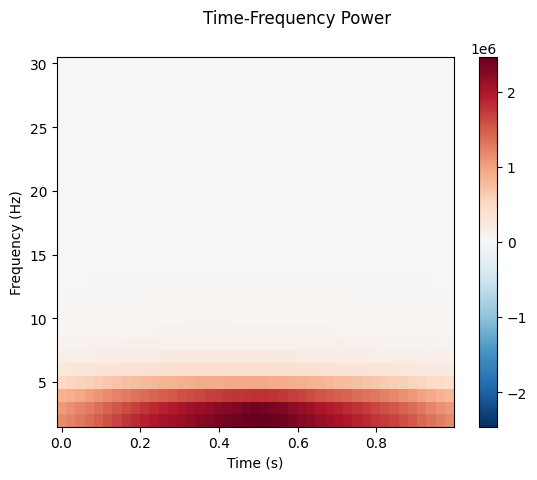

In [ ]:
fmin = 2  # Minimum frequency for the analysis (in Hz)
fmax = 30  # Maximum frequency for the analysis (in Hz)
freqs = np.arange(fmin, fmax + 1, 1)  # Frequencies to be analyzed
n_cycles = freqs  # Set n_cycles to the same as freqs for Morlet wavelets
time_bandwidth = 5.0  # Time bandwidth parameter for multitaper

# Create Events
events = mne.make_fixed_length_events(raw_data, duration=1.0)

# Create Epochs
epochs = mne.Epochs(raw_data, events, tmin=0, tmax=1, baseline=None, detrend=1, preload=True)

# Perform Time-Frequency Analysis
power = mne.time_frequency.tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles,
                                         time_bandwidth=time_bandwidth, use_fft=True,
                                         return_itc=False, decim=3, n_jobs=1)

# Plot the TFR
power.plot([0], baseline=None, mode='logratio', title='Time-Frequency Power')
plt.show()

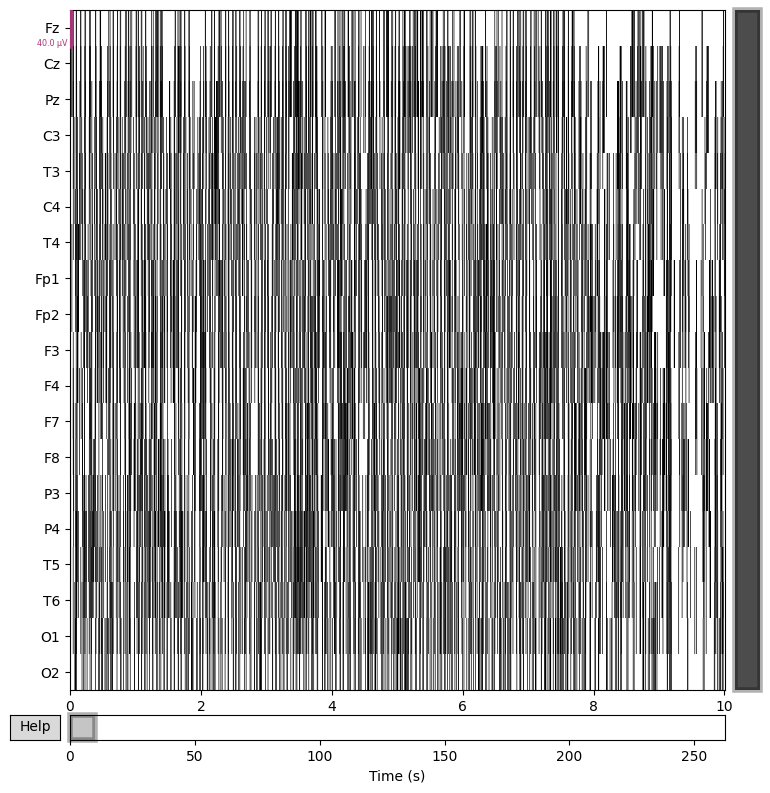

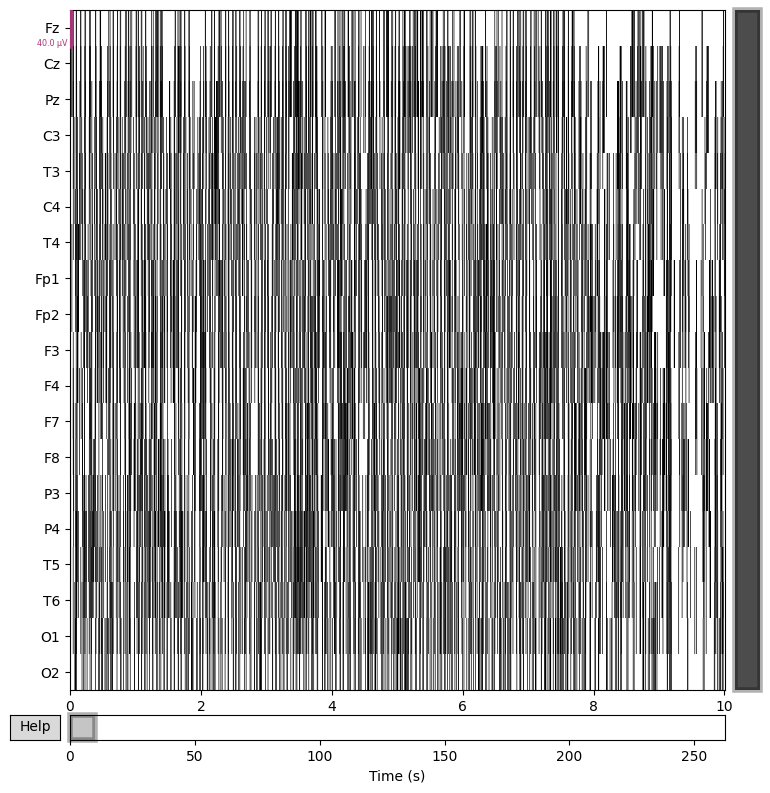

In [ ]:
raw_data.plot()

In [ ]:
ica.exclude = [0, 1]  # Exclude selected components
cleaned_raw = raw_data.copy()
ica.apply(cleaned_raw)


Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 19 PCA components


<RawArray | 19 x 33570 (262.3 s), ~4.9 MB, data loaded>

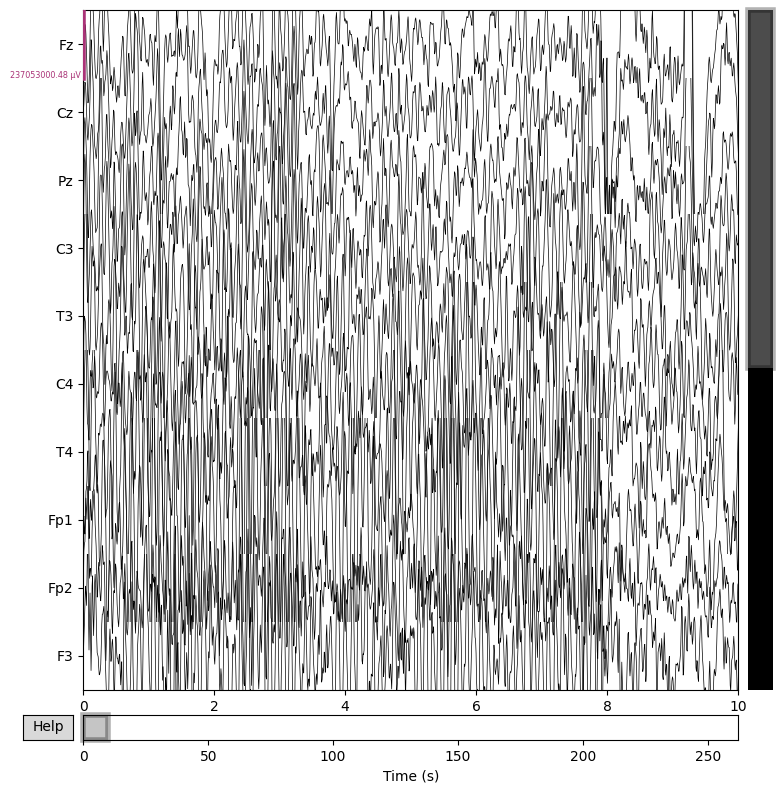

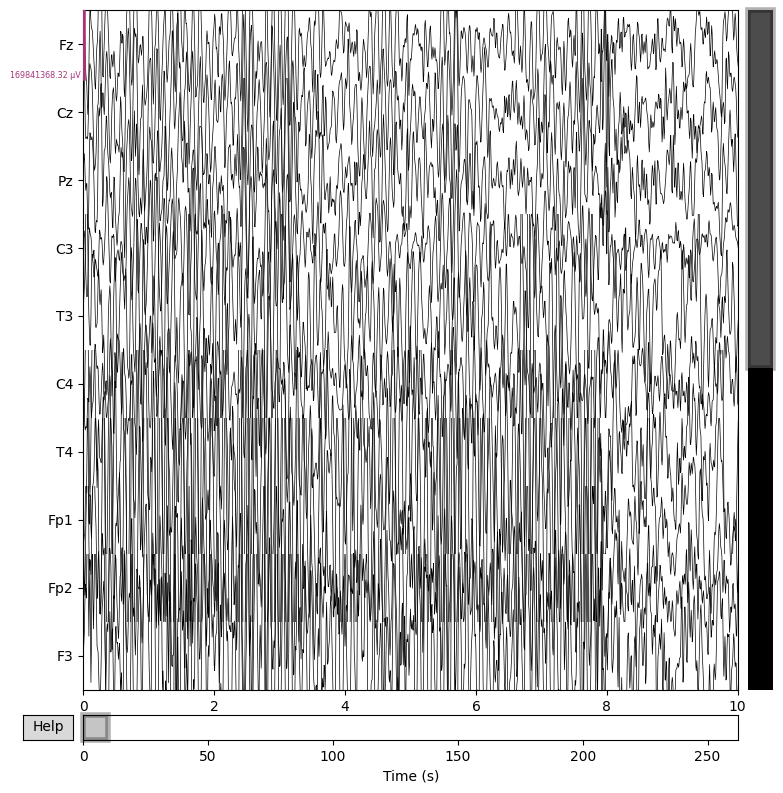

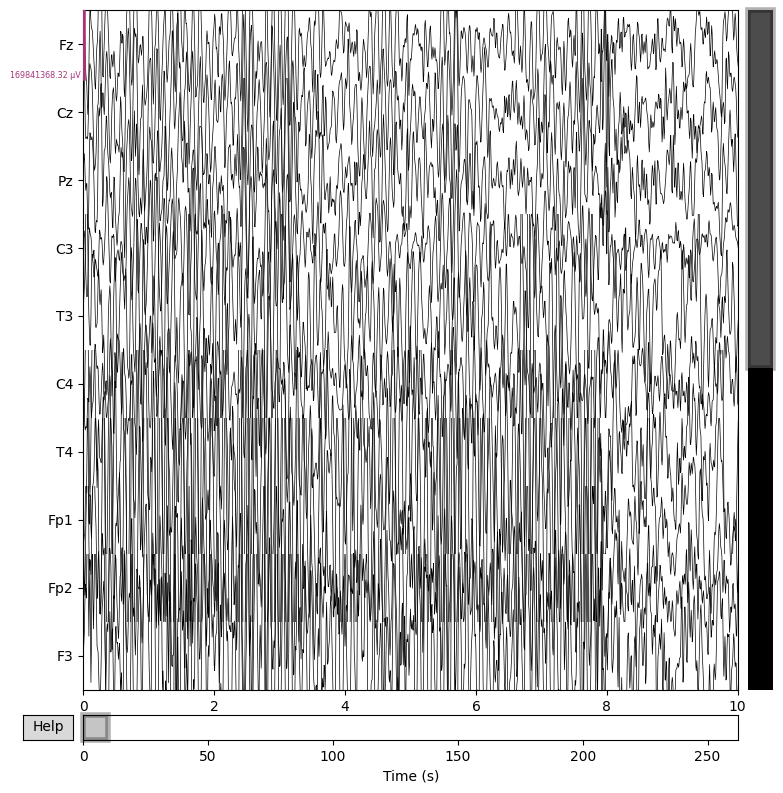

In [ ]:
cleaned_raw.plot(l_freq=4,h_freq=30)

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
fmin = 2  # Minimum frequency for the analysis (in Hz)
fmax = 30  # Maximum frequency for the analysis (in Hz)
psd, freqs = mne.time_frequency.psd_multitaper(cleaned_raw_data, fmin=fmin, fmax=fmax)

# Plot the PSD
plt.figure(figsize=(10, 6))
plt.plot(freqs, 10 * np.log10(psd.mean(0)), color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectral Density')
plt.grid()
plt.show()

NameError: ignored

Creating RawArray with float64 data, n_channels=19, n_times=19026
    Range : 0 ... 19025 =      0.000 ...   148.633 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 3.3s.
Creating RawArray with float64 data, n_channels=19, n_times=16549
    Range : 0 ... 16548 =      0.000 ...   129.281 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.9s.
Creating RawArray with float64 data, n_channels=19, n_times=16044
    Range : 0 ... 16043 =      0.000 ...   125.336 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.5s.
Creating RawArray with float64 data, n_channels=19, n_times=19794
    Range : 0 ... 19793 =      0.000 ...   154.633 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 3.1s.
Creating RawArray with float64 data, n_channels=19, n_times=15651
    Range : 0 ... 15650 =      0.000 ...   122.266 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 4.5s.
Creating RawArray with float64 data, n_channels=19, n_times=15943
    Range : 0 ... 15942 =      0.000 ...   124.547 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.8s.
Creating RawArray with float64 data, n_channels=19, n_times=15574
    Range : 0 ... 15573 =      0.000 ...   121.664 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 2.1s.
Creating RawArray with float64 data, n_channels=19, n_times=19301
    Range : 0 ... 19300 =      0.000 ...   150.781 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.4s.
Creating RawArray with float64 data, n_channels=19, n_times=13304
    Range : 0 ... 13303 =      0.000 ...   103.930 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.8s.
Creating RawArray with float64 data, n_channels=19, n_times=15310
    Range : 0 ... 15309 =      0.000 ...   119.602 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 0.9s.
Creating RawArray with float64 data, n_channels=19, n_times=12750
    Range : 0 ... 12749 =      0.000 ...    99.602 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Creating RawArray with float64 data, n_channels=19, n_times=11393
    Range : 0 ... 11392 =      0.000 ...    89.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 1.2s.
Creating RawArray with float64 data, n_channels=19, n_times=12500
    Range : 0 ... 12499 =      0.000 ...    97.648 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.9s.
Creating RawArray with float64 data, n_channels=19, n_times=16704
    Range : 0 ... 16703 =      0.000 ...   130.492 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 1.4s.
Creating RawArray with float64 data, n_channels=19, n_times=13918
    Range : 0 ... 13917 =      0.000 ...   108.727 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 1.0s.
Creating RawArray with float64 data, n_channels=19, n_times=10871
    Range : 0 ... 10870 =      0.000 ...    84.922 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.8s.
Creating RawArray with float64 data, n_channels=19, n_times=16513
    Range : 0 ... 16512 =      0.000 ...   129.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.6s.
Creating RawArray with float64 data, n_channels=19, n_times=14692
    Range : 0 ... 14691 =      0.000 ...   114.773 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 1.3s.
Creating RawArray with float64 data, n_channels=19, n_times=13883
    Range : 0 ... 13882 =      0.000 ...   108.453 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 23.9s.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Creating RawArray with float64 data, n_channels=19, n_times=14282
    Range : 0 ... 14281 =      0.000 ...   111.570 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 1.0s.
Creating RawArray with float64 data, n_channels=19, n_times=10452
    Range : 0 ... 10451 =      0.000 ...    81.648 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.8s.
Creating RawArray with float64 data, n_channels=19, n_times=10864
    Range : 0 ... 10863 =      0.000 ...    84.867 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.6s.
Creating RawArray with float64 data, n_channels=19, n_times=9823
    Range : 0 ... 9822 =      0.000 ...    76.734 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.6s.
Creating RawArray with float64 data, n_channels=19, n_times=19122
    Range : 0 ... 19121 =      0.000 ...   149.383 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 1.6s.
Creating RawArray with float64 data, n_channels=19, n_times=16239
    Range : 0 ... 16238 =      0.000 ...   126.859 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 1.0s.
Creating RawArray with float64 data, n_channels=19, n_times=7983
    Range : 0 ... 7982 =      0.000 ...    62.359 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.5s.
Creating RawArray with float64 data, n_channels=19, n_times=19234
    Range : 0 ... 19233 =      0.000 ...   150.258 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 1.1s.
Creating RawArray with float64 data, n_channels=19, n_times=14139
    Range : 0 ... 14138 =      0.000 ...   110.453 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 1.4s.
Creating RawArray with float64 data, n_channels=19, n_times=12929
    Range : 0 ... 12928 =      0.000 ...   101.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.4s.
Creating RawArray with float64 data, n_channels=19, n_times=16769
    Range : 0 ... 16768 =      0.000 ...   131.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 2.3s.
Not setting metadata
131 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 131 events and 129 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


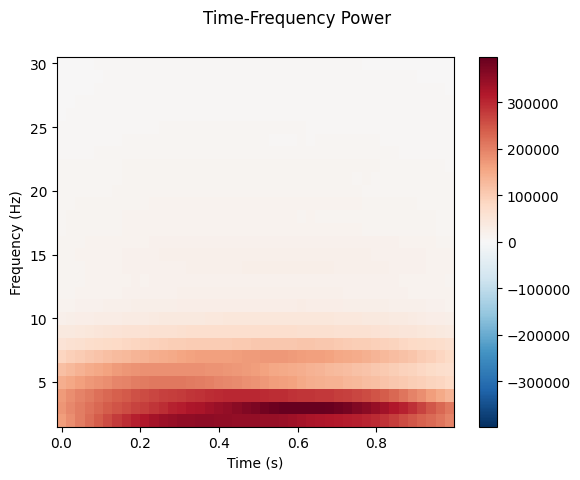

In [ ]:
# data_dir='/content/drive/MyDrive/dataset/Control_part1'
# sfreq=128
# channel_labels= ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']
# info = mne.create_info(channel_labels, sfreq, ch_types='eeg')#to create a rawobject it needs info
# #def pre_process_data(file_name)
# for file_name in os.listdir(data_dir):
#   if file_name.endswith('.mat'):
#     mat_data=scipy.io.loadmat(os.path.join(data_dir,file_name))
#     file_name_only=file_name[:-4]
#     eeg_data=mat_data[file_name_only]
#     eeg_data=eeg_data.transpose()
#     raw_data = mne.io.RawArray(eeg_data, info)
#     #missing_channels = ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']
#     #missing_montage = mne.channels.make_standard_montage( missing_channels)
#     #raw_data.set_montage(montage)
#     raw_data.filter(2, 30, fir_design='firwin')#going to use low pas as 2 as trial
#     #because 0.5 to 4 hz represent unconsciousness or deepsleep , so i presume it wont be important
#     #and high pass is 30hz this will help in reducing computation
#     ica = mne.preprocessing.ICA(n_components=15, random_state=69, max_iter=800)#n_components shouldnt be more htan the no of labels so for trial ill use 15
#     ica.fit(raw_data)

#     #layout = mne.channels.make_standard_montage('standard_1020').plot(kind='topomap', show=False)
#    # ica.plot_components(picks=range(n_components), inst=raw_data, topo_layout=montage, show=True)

# fmin = 2  # Minimum frequency for the analysis (in Hz)
# fmax = 30  # Maximum frequency for the analysis (in Hz)
# freqs = np.arange(fmin, fmax + 1, 1)  # Frequencies to be analyzed
# n_cycles = freqs  # Set n_cycles to the same as freqs for Morlet wavelets
# time_bandwidth = 2.0  # Time bandwidth parameter for multitaper

# # Create Events
# events = mne.make_fixed_length_events(raw_data, duration=1.0)

# # Create Epochs
# epochs = mne.Epochs(raw_data, events, tmin=0, tmax=1, baseline=None, detrend=1, preload=True)

# # Perform Time-Frequency Analysis
# power = mne.time_frequency.tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles,
#                                          time_bandwidth=time_bandwidth, use_fft=True,
#                                          return_itc=False, decim=3, n_jobs=1)

# # Plot the TFR
# power.plot([0], baseline=None, mode='logratio', title='Time-Frequency Power')
# plt.show()